In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import LineString, Point, Polygon

In [2]:
# Path to course data folder
data_folder_fp = os.path.join('/',
                              'courses',
                              'EDS220', 
                              'data')

# Import and simplify states polygons
df = gpd.read_file(os.path.join(data_folder_fp, 
                                    'arctic_communities.geojson'))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [3]:
df.head(3)

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
2,Sweden,SE,133,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."


In [4]:
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

In [5]:
if (df.geom_type.unique() == "Polygon").all():
    print("All features are polygons.")
else: 
    print(f"Multiple feature types: {df.geom_type.unique().tolist()}")

Multiple feature types: ['MultiPolygon', 'Polygon']


In [6]:
def check_polygons(df):
    if (df.geom_type.unique() == "Polygon").all():
        print("All features are polygons.")
    else: 
        print(f"Multiple feature types: {df.geom_type.unique().tolist()}")

In [7]:
check_polygons(df)

Multiple feature types: ['MultiPolygon', 'Polygon']


In [8]:
df = df.explode(index_parts = False)

In [9]:
df = df.reset_index()

In [10]:
check_polygons(df)

All features are polygons.


In [21]:
print(df.iloc[[0]]["geometry"])
type(df.iloc[[0]]["geometry"])

0    POLYGON ((-132.74687 56.52568, -132.75762 56.5...
Name: geometry, dtype: geometry


geopandas.geoseries.GeoSeries

In [23]:
df.iloc[[0]]["geometry"].bounds["miny"]

0    56.511035
Name: miny, dtype: float64

In [24]:
def min_y(geodf_row):
    return geodf_row.geometry.bounds[1]

In [25]:
df["miny"] = df.apply(min_y, axis =1)

df.head(3)

,index,admin,country,n_communities,geometry,miny
0,0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5...",56.511035
1,0,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2...",56.244141
2,0,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2...",58.204102
3,0,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3...",60.312646
4,0,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8...",59.812646
...,...,...,...,...,...,...
476,13,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9...",67.878809
477,13,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9...",66.857812
478,13,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9...",67.987598
479,13,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5...",69.539307


In [31]:
arctic = df[df["miny"] >= 40]
arctic = arctic.to_crs("EPSG:3413")

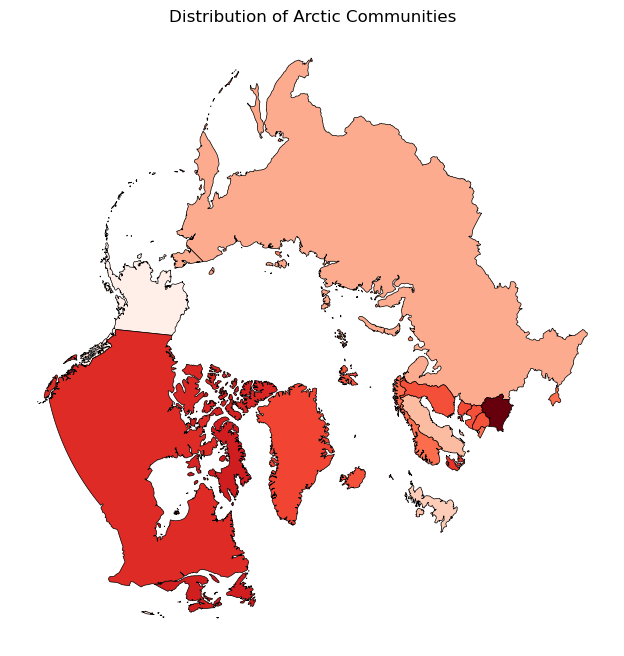

In [32]:
# a. Map
fig, ax = plt.subplots(figsize = (10,8)) # in inches

# Remove axis for a cleaner map
ax.axis('off')

# Add title
ax.set_title('Distribution of Arctic Communities', fontsize = 12)

# Add data
arctic.plot(ax = ax,
               #column = "n_spills",
               legend = True,
               edgecolors = 'black',
               cmap = "Reds",
               linewidth = 0.5,
               legend_kwds = {'label': 'Number of Arctic Communities'})
                  
plt.show()